In [1]:
import nltk
#nltk.download_shell()

In [2]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [3]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [4]:
len(messages)

5574

In [5]:
for i,j in enumerate(messages):
    print(i)
    print(j)
    print('\n')
    

0
ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1
ham	Ok lar... Joking wif u oni...


2
spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3
ham	U dun say so early hor... U c already then say...


4
ham	Nah I don't think he goes to usf, he lives around here though


5
spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6
ham	Even my brother is not like to speak with me. They treat me like aids patent.


7
ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8
spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['labels','messages'])

In [8]:
messages.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
messages['length'] = messages['messages'].apply(len)

In [10]:
messages.head()

,labels,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

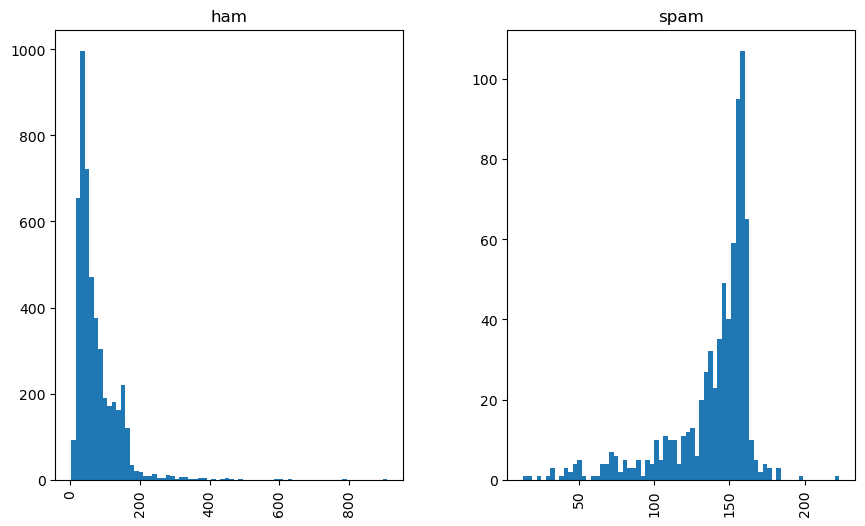

In [11]:
messages.hist(bins=70,column = 'length',by = 'labels',figsize=(10,6))

In [12]:
import string

In [13]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
ex = 'Sample String! Notice: It has punctuation'
nopunc = [word for word in ex if word.lower() not in string.punctuation]

In [15]:
nopunc = ''.join(nopunc)

In [16]:
from nltk.corpus import stopwords

In [17]:
#stopwords.words('english')

In [18]:
nomess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [19]:
nomess

['Sample', 'String', 'Notice', 'punctuation']

In [20]:
def mess_transformer(mess):
    nopunc = [char for char in mess if char.lower() not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [21]:
messages['messages'].head().apply(mess_transformer)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: messages, dtype: object

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
bow_transform = CountVectorizer(analyzer=mess_transformer).fit(messages['messages'])

In [24]:
mess4=messages['messages'][3]

In [25]:
mess4

'U dun say so early hor... U c already then say...'

In [26]:
bowmess4 = bow_transform.transform([mess4])

In [27]:
print(bowmess4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [28]:
bow_transform.get_feature_names_out()[4068]

'U'

In [30]:
bow_messages = bow_transform.transform(messages['messages'])

In [31]:
from sklearn.feature_extraction.text import TfidfTransformer

In [32]:
tfid_transformer = TfidfTransformer().fit(bow_messages)

In [33]:
tfid_messages = tfid_transformer.transform(bow_messages)

In [34]:
from sklearn.naive_bayes import MultinomialNB

In [35]:
mnb = MultinomialNB()

In [37]:
mnb.fit(tfid_messages,messages['labels'])

MultinomialNB()

In [42]:
pred = mnb.predict(tfidf4)

In [40]:

tfidf4 = tfid_transformer.transform(bowmess4)

In [43]:
pred[0]

'ham'

In [45]:
messages['labels'][0]

'ham'

In [48]:
all_pred = mnb.predict(tfid_messages)

In [49]:
from sklearn.model_selection import train_test_split

In [51]:
mess_train,mess_test,label_train,label_test = train_test_split(messages['messages'],messages['labels'])

In [52]:
from sklearn.pipeline import Pipeline

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=mess_transformer)),
    ('tfid', TfidfTransformer()),
    ('mnb',MultinomialNB())
])

In [54]:
pipeline.fit(mess_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function mess_transformer at 0x000001893FD45260>)),
                ('tfid', TfidfTransformer()), ('mnb', MultinomialNB())])

In [55]:
prediction = pipeline.predict(mess_test)

In [56]:
from sklearn.metrics import classification_report,confusion_matrix

In [57]:
print(classification_report(label_test,prediction))
print(confusion_matrix(label_test,prediction))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1204
        spam       1.00      0.70      0.82       189

    accuracy                           0.96      1393
   macro avg       0.98      0.85      0.90      1393
weighted avg       0.96      0.96      0.96      1393

[[1204    0]
 [  57  132]]


In [59]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=mess_transformer)),
    ('tfid', TfidfTransformer()),
    ('mnb',RandomForestClassifier())
])

In [60]:
pipeline.fit(mess_train,label_train)
prediction = pipeline.predict(mess_test)
print(classification_report(label_test,prediction))
print(confusion_matrix(label_test,prediction))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1204
        spam       1.00      0.79      0.88       189

    accuracy                           0.97      1393
   macro avg       0.98      0.90      0.93      1393
weighted avg       0.97      0.97      0.97      1393

[[1204    0]
 [  39  150]]
